In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
class LinearRegression:
    
    def __init__(self, file_name = "", alpha = 0.01, tolerance = 0.000001, max_iter =  1000000):
        self.file_name = file_name
        self.alpha = alpha
        self.tolerance = tolerance
        self.max_iter = max_iter
        
        #preparing the data
        self.data = pd.read_csv(self.file_name) #read csv file
        self.x = self.data.iloc[:,:-1] #separate all x features 
        ones = pd.DataFrame(np.ones(self.data.y.shape[0])) #make x_0 = 1 
        self.x = pd.concat([ones,self.x], axis=1) #add x_0 to the x features
        self.x = np.asmatrix(self.x) #
        self.y = np.asmatrix(self.data.y).T #
        
        #generating a random theta
        self.theta = np.asmatrix((2*np.random.rand(self.x.shape[1]))-1).T
        
        self.h = None
        self.hy_diff = None
        self.j = None
        self.gradient = None
        
        #make an initial list where you append J
        self.cost = []
        return
    
    # Compute hypothesis function 
    def eval_h(self):
        self.h = np.dot(self.x,self.theta)
    
    # Compute cost function 
    def eval_j(self):
        self.hy_diff = self.h - self.y
        self.j = (1/(2*self.y.shape[0]))* np.dot(self.hy_diff.T, self.hy_diff)[0,0]
        
    # Compute the gradient of J
    def gradient_j(self):
        self.gradient = (1/self.y.shape[0])* np.dot(self.x.T, self.hy_diff)
     
    # Update equation for gradient descent
    def update_theta(self):
        self.theta = self.theta - self.alpha * self.gradient
    
    #Initiate regression
    def regression(self):
        for i in range(int(self.max_iter)):
            self.eval_h()
            self.eval_j()
            self.cost.append(self.j)
            self.gradient_j()
            self.update_theta()
            if i>0 and abs(self.cost[i]-self.cost[i-1])<= self.tolerance:
                print("Ending at iteration:", i+1)
                break
    
    #plot results
    def graph(self,label=""):
        x = np.arange(0,len(self.cost),1)
        y = np.array(self.cost)
        plt.xlabel('Training iterations')
        plt.ylabel('Cost function')
        plt.grid()
        plt.plot(x, y, label=label)
        plt.show

## PART I. MODEL DEVELOPMENT

In this laboratory exercise, you will make a linear regression model that can be used to fit data of any dimension (e.g. # of features and # of samples). As classes enable you to easily share data among different functions, you are encouraged to use them. To aid in the model development, use the data in “number1.csv.” Answer the following questions. 


### 1.	What are the parameter values, θ? 

Ending at iteration: 43695
parameter values: [[0.06072819]
 [0.79151681]
 [1.20755193]]


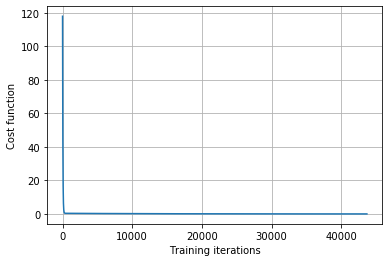

In [10]:
#Part I.1.
linregtrain = LinearRegression('number1.csv', alpha=0.0001)
linregtrain.regression()
linregtrain.graph()
print('parameter values:', linregtrain.theta)

### 2. Try different learning rate values and compare the behavior of the cost as a function of iteration by plotting them (submit plots). What do you observe?

Plots are submitted in the doc file for this exercise.

Ending at iteration: 639
Ending at iteration: 75
Ending at iteration: 8566
Ending at iteration: 5571


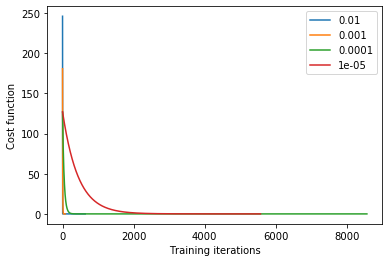

In [11]:
alpha = [0.01, 0.001, 0.0001,0.00001]
for i in alpha:
    linregtrain = LinearRegression('number1.csv',alpha = i)
    linregtrain.regression()
    linregtrain.graph(label=i)
plt.legend(loc='best')

### 3.	Using the trained model, predict the value of y at x1 = 13 and x2 = 15

In [5]:
#Part I.3. 
x = np.asmatrix([[1., 13., 15.]])
y = np.dot(x, linregtrain.theta)[0,0]
print('Using theta obtained from I.1:',linregtrain.theta)
print("y value is:", y)

Using theta obtained from I.1: [[ 0.54703345]
 [-0.04189827]
 [ 1.87834252]]
y value is: 28.177493686338696


### PART II. APPLICATION

A lost alien is stuck on an unknown planet in the Solar System. In order for him to call for rescue, he must first know where he is. He does this by measuring the surface gravitational acceleration by throwing a stone and taking note of its height as a function of time. Use the code developed in part I to help him find out where he is. His data, which contains time in seconds and the corresponding height in meters, are in “projectile_data.csv.” A list of the planets and their corresponding surface gravitational acceleration are shown below.


| Planet | Surface gravitational acceleration ($m/s^2$) | 
| --- | --- |
| Jupiter | 24.92 | 
| Neptune | 11.15 | 
| Saturn | 10.44 | 
| Pluto | 0.58 | 
| Uranus | 8.87 | 
| Mars | 3.71

In a projectile motion <br>
<center>$y=y_{0}+v_{0}t + \frac{1}{2}gt^{2}$ <br></center>
Applying this to our hypothesis function: 
<center>$x_{0} = 0$</center><br>
<center>$x_{1} = t$</center><br>
    <center>$x_{2} = t^{2}$</center><br>
where 
$\theta_{1} = v$ and $\theta_{2}$ should be equal to $\frac{1}{2}g$. To get acceleration, first add $t^{2}$ dataframe.
    


### 1.	Did the training/fitting converge? If not, what can you do to make it converge?

C:\Users\Guest1\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


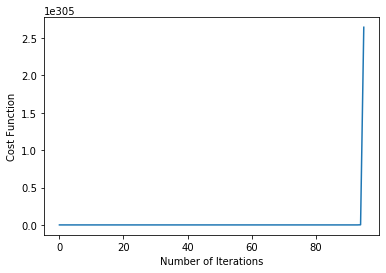

In [6]:
# Create t^2 data.
linregtest = LinearRegression('projectile_data.csv', alpha=0.01)
tsquared = linregtest.data.t**2

x = pd.DataFrame(linregtest.x)

#add the t^2 data to the test dataset
x = pd.concat([x,tsquared], axis=1)
x = np.asmatrix(x)
linregtest.x = x

#Generate random theta
linregtest.theta = np.asmatrix((2*np.random.rand(3))-1).T
linregtest.theta

#performing the regression
linregtest.regression()
linregtest.graph()

Since with alpha = 0.01, the fitting doesn't converge, it is imperative for us to try lowering the learning rate in order to make the fitting converge.

Ending at iteration: 187020


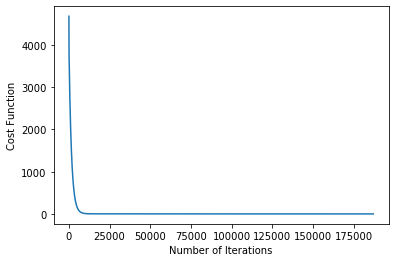

In [7]:
#Create t^2 data.
linregtest = LinearRegression('projectile_data.csv', alpha=0.0001)
tsquared = linregtest.data.t**2

x = pd.DataFrame(linregtest.x)

#add the t^2 data to the test dataset
x = pd.concat([x,tsquared], axis=1)
x = np.asmatrix(x)
linregtest.x = x

#Generate random theta
linregtest.theta = np.asmatrix((np.random.rand(3))).T
linregtest.theta

#performing the regression
linregtest.regression()
linregtest.graph()

### 2.	On which planet is he located?

Use the theta obtained to get the surface gravitational acceleration of the planet. <br>
Since <br>
<center>$\theta_{2} = \frac{1}{2}g$</center>
<center>$g= 2 \theta_{2}$</center>

In [8]:
acceleration = 2*linregtest.theta[2,0]
acceleration

-8.814168839140265

Comparing the results obtained with the table on Part II, we get that our $g$ obtained is closest to that of the acceleration of Uranus, thus the lost alien is in Uranus.

### 3.Try different learning rate values and compare the behavior of the cost as a function of iteration by plotting them (submit plots). What do you observe?  

Plots are submitted in the doc file for this exercise.

Ending at iteration: 26704
Ending at iteration: 221345


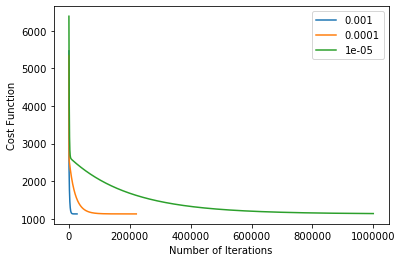

In [9]:
alpha = [0.001, 0.0001,0.00001]
for i in alpha:
    linregtest = LinearRegression('projectile_data.csv',alpha = i)
    linregtest.regression()
    linregtest.graph(label=i)
plt.legend(loc='best')